In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.special import erfc

In [11]:
df_melt = pd.read_csv('../docs 2nd Approach/remove_outlier_whole_std.csv')

In [12]:
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function ,

In [13]:
df = {}
df_remove = df_melt
df_remove = df_remove.reset_index(drop=True)

In [14]:
count = 0 
while(len(df_remove[chauvenet(df_remove['value']) == True]) != 0 ):
    len_0 = len(df_remove)
    print(df_remove['value'].mean())
    df[f'Iteration - {count}'] = [df_remove['value'].mean(), df_remove['value'].std()]
    df_remove = df_remove.drop(df_remove[chauvenet(df_remove['value']) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_remove))
    df_remove = df_remove.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df

0.13004189146692857
0.0761832673032932


,Iteration - 0,Iteration - 1
Mean,0.130042,0.076183
Standard Deviation,0.339204,0.214407
Outlier,403.000000,18.000000


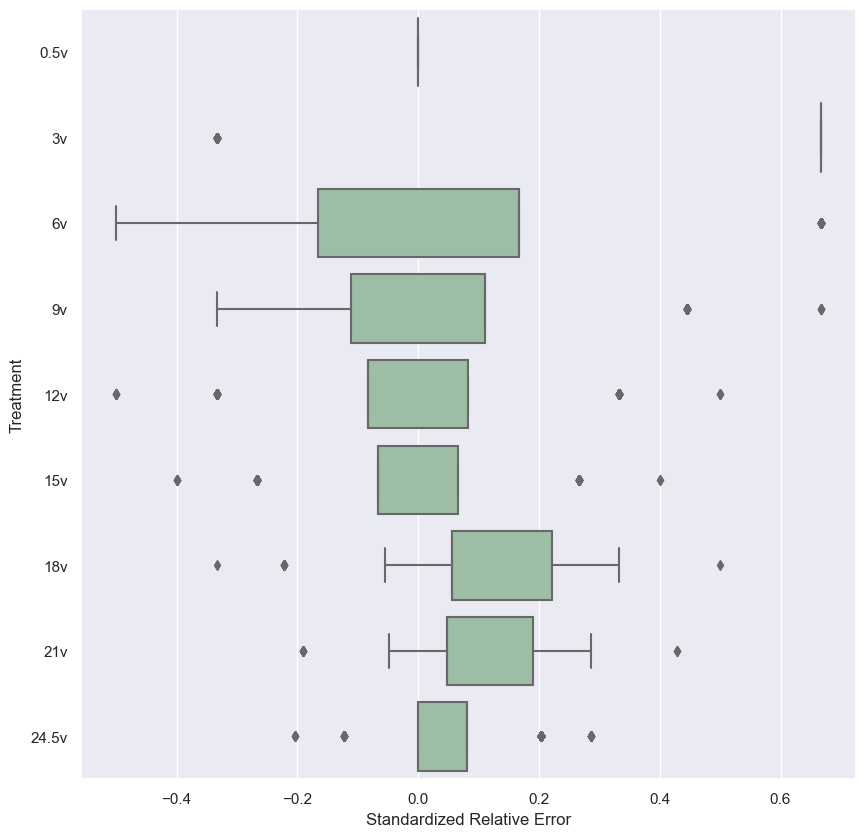

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_remove, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier Chauvenet Criterion + Whole Std.png')
plt.show()

In [16]:
df_remove.to_csv('../docs 2nd Approach/remove_outlier_Chauvenet + whole std.csv', index=False)